<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [123]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
!pip install -q fitter
!pip install ucimlrepo
!pip install numpy==1.24.4
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

# range_date
rd = pd.date_range(start ='1/1/2025', end ='2/1/2025', freq ='h')
print(rd)
print(type(rd[2]))
print(len(rd))

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-31 15:00:00', '2025-01-31 16:00:00',
               '2025-01-31 17:00:00', '2025-01-31 18:00:00',
               '2025-01-31 19:00:00', '2025-01-31 20:00:00',
               '2025-01-31 21:00:00', '2025-01-31 22:00:00',
               '2025-01-31 23:00:00', '2025-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='h')
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
745


In [100]:
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()

,data
datetime,
2025-01-31 20:00:00,66
2025-01-31 21:00:00,74
2025-01-31 22:00:00,91
2025-01-31 23:00:00,77
2025-02-01 00:00:00,61


In [101]:
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-31']
print(filtered_df)


                     data
datetime                 
2025-01-31 00:00:00    67
2025-01-31 01:00:00    62
2025-01-31 02:00:00    69
2025-01-31 03:00:00    45
2025-01-31 04:00:00    42
2025-01-31 05:00:00    33
2025-01-31 06:00:00    24
2025-01-31 07:00:00    66
2025-01-31 08:00:00    76
2025-01-31 09:00:00    66
2025-01-31 10:00:00    72
2025-01-31 11:00:00    71
2025-01-31 12:00:00     4
2025-01-31 13:00:00    20
2025-01-31 14:00:00    22
2025-01-31 15:00:00    83
2025-01-31 16:00:00    31
2025-01-31 17:00:00    23
2025-01-31 18:00:00    54
2025-01-31 19:00:00    22
2025-01-31 20:00:00    66
2025-01-31 21:00:00    74
2025-01-31 22:00:00    91
2025-01-31 23:00:00    77




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [102]:
### 1) Se lee el dataset
df = pd.read_csv(f"https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [103]:
### 2) Se define como indice la columna time
df.set_index('time', inplace=True)
df.head()
df.tail()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
2023-05-12 22:00:00,4998,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140
2023-05-12 23:00:00,4999,1.08521,1.08522,1.08478,1.08494,706,8,0,1.085075,-0.00024,-0.00010,-0.000170


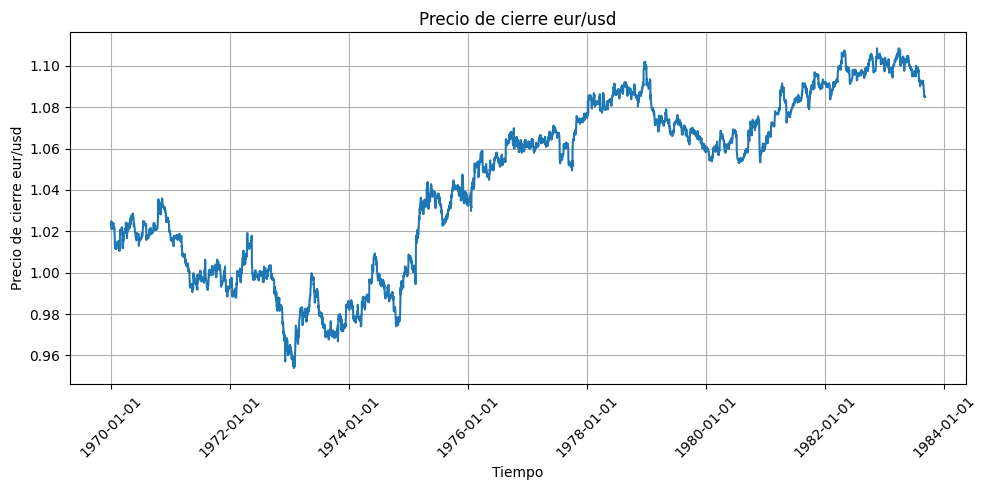

In [130]:
### 3) Se describe la información
fig, ax = plt.subplots(figsize=(10, 5))
# Se utiliza el nombre de la columna 'Close' después de aplicar PascalCase
ax.plot(df.index, df['Close'])
ax.set_title('Precio de cierre eur/usd')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Precio de cierre eur/usd')
ax.grid()

# Formato de fecha y espaciado
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


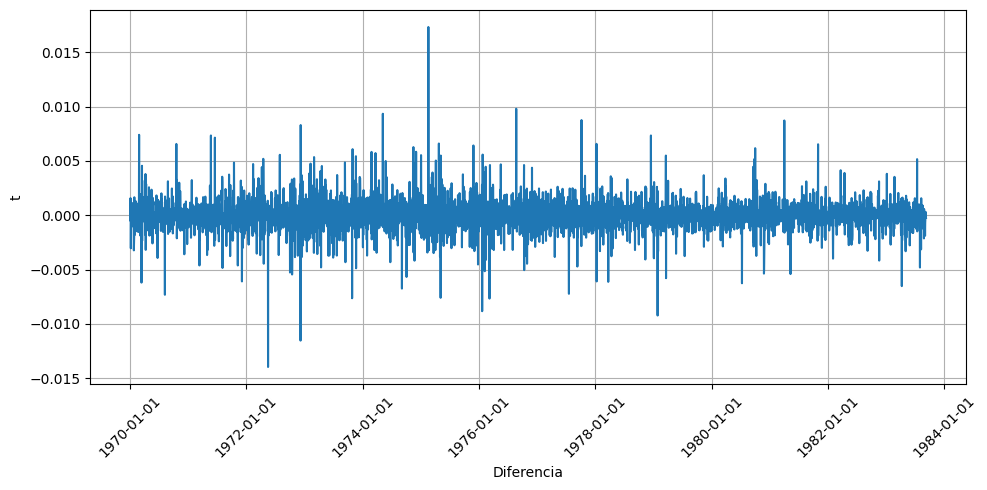

In [131]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index,df['DiffClose'])
ax.set_xlabel('Diferencia')
ax.set_ylabel('t')
ax.grid()

# Formato de fecha y espaciado
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
### 4) Visualización de datos null y nan
df.isnull().sum()

,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0


In [107]:
df.isna().sum()

,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0


In [112]:
#5. Formato PascalCase

def PascalCase(dataframe):
  newdf = dataframe.strip().title().replace("_","")
  return newdf

df = df.rename(mapper = PascalCase, axis="columns")
df.head()



,Unnamed: 0,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen,Diffprice
time,,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640,-0.00082
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640,-0.00046
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580,0.00154
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895,0.00031
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365,-0.00304


In [113]:
### 6) Se añade la columna DiffPrice
df_nuevo = pd.DataFrame(df['Close'])
df_nuevo

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [114]:
df_nuevo['DiffPrice'] = df_nuevo.Close.diff()
df_nuevo.drop(df_nuevo.index[0], inplace=True)
df_nuevo.head()

,Close,DiffPrice
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082


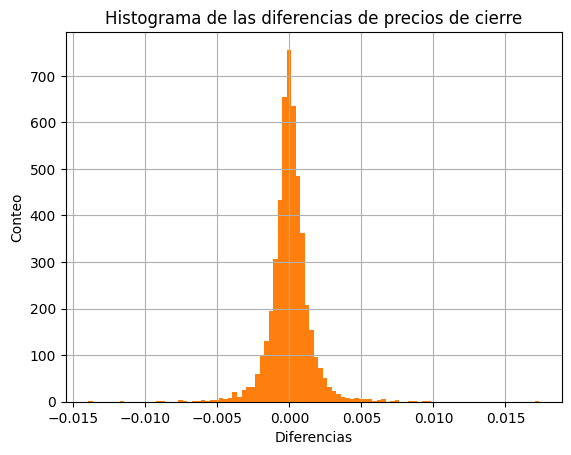

In [115]:
plt.hist(df_nuevo["DiffPrice"], bins=100)
plt.title('Histograma de diferencias de precios de cierre')
plt.hist(df_nuevo["DiffPrice"], bins=100)
plt.title('Histograma de diferencias de precios de cierre')
plt.xlabel('Diferencias')
plt.ylabel('Conteo')
plt.grid()
plt.title('Histograma de las diferencias de precios de cierre')
plt.xlabel('Diferencias')
plt.ylabel('Conteo')
plt.show()
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,23122.545603,-311.443279,-298.409293,inf,0.042450,2.893321e-08
lognorm,106500.661168,3074.521081,3094.072060,inf,0.091597,5.996555e-37
norm,106744.023571,3180.994184,3194.028170,inf,0.090533,4.194767e-36
chi2,465484.062385,7.690727,27.241707,inf,0.303465,0.000000e+00
exponpow,678726.275806,252.043881,271.594860,inf,0.532553,0.000000e+00


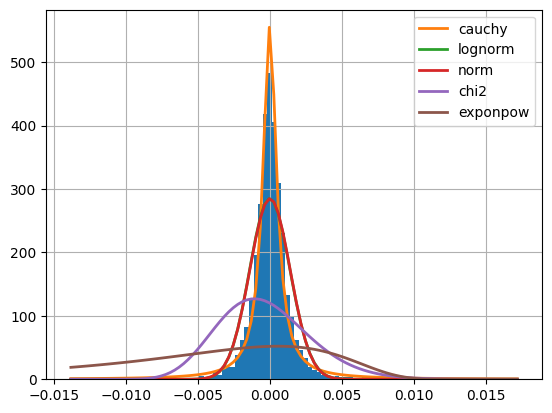

In [119]:
### 6)
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df_nuevo['DiffPrice'],
           distributions= get_common_distributions())
f.fit()
f.summary()


In [121]:
f.get_best()

{'cauchy': {'loc': -3.886416787281632e-06, 'scale': 0.0005716470285645184}}

De la figura y datos obtenidos se observa que, la distribución de Cauchy es la que mejor se adapta a los datos proporcionados

---



In [60]:
### 7) Selección de datos del 2023
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [61]:
df_2023 = df[df.index.year==2023]
df_2023

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-02 00:00:00,2722,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315,-0.00202
2023-01-02 01:00:00,2723,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090,0.00118
2023-01-02 02:00:00,2724,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055,0.00093
2023-01-02 03:00:00,2725,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345,-0.00162
2023-01-02 04:00:00,2726,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895,-0.00015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545,-0.00038
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020,0.00030
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075,-0.00015


In [62]:
### 8) Se agrupan los datos, por días, mes y semana

### Promedio de datos por 15 días
df_2023.groupby(pd.Grouper(freq='15D')).mean()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-02,2853.5,1.069313,1.070248,1.068430,1.069361,3503.856061,10.181818,0.0,1.069337,0.000047,0.000043,0.000045,0.000048
2023-01-17,3117.5,1.085552,1.086401,1.084746,1.085565,3191.670455,8.973485,0.0,1.085558,0.000015,0.000020,0.000017,0.000013
2023-02-01,3381.5,1.077734,1.078544,1.076861,1.077679,3179.253788,8.863636,0.0,1.077707,-0.000066,-0.000069,-0.000068,-0.000055
2023-02-16,3645.5,1.063187,1.063884,1.062480,1.063150,2926.143939,8.833333,0.0,1.063169,-0.000034,-0.000034,-0.000034,-0.000037
2023-03-03,3909.0,1.063175,1.064041,1.062303,1.063186,3618.418251,8.904943,0.0,1.063181,0.000026,0.000023,0.000024,0.000011
2023-03-18,4160.0,1.080871,1.081651,1.080142,1.080936,2913.150628,8.861925,0.0,1.080903,0.000074,0.000077,0.000076,0.000066
2023-04-02,4399.5,1.093027,1.093724,1.092419,1.093090,2085.712500,9.041667,0.0,1.093059,0.000063,0.000063,0.000063,0.000063
2023-04-17,4651.5,1.099085,1.099761,1.098398,1.099084,2277.863636,8.715909,0.0,1.099085,-0.000006,-0.000009,-0.000008,-0.000001
2023-05-02,4891.5,1.098948,1.099641,1.098257,1.098889,2295.592593,8.648148,0.0,1.098918,-0.000059,-0.000056,-0.000057,-0.000060


In [63]:
### Promedio de datos por mes
df_2023.groupby(pd.Grouper(freq='1ME')).mean()


,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-31,2985.5,1.077433,1.078325,1.076588,1.077463,3347.763258,9.577652,0.0,1.077448,0.000031,0.000031,0.000031,0.000031
2023-02-28,3489.5,1.071221,1.071972,1.070433,1.071167,3029.912500,8.825000,0.0,1.071194,-0.000060,-0.000062,-0.000061,-0.000054
2023-03-31,4004.5,1.070837,1.071657,1.070032,1.070874,3282.461818,8.901818,0.0,1.070855,0.000049,0.000049,0.000049,0.000037
2023-04-30,4519.5,1.096012,1.096711,1.095365,1.096051,2208.629167,8.854167,0.0,1.096032,0.000036,0.000036,0.000036,0.000040
2023-05-31,4879.5,1.099051,1.099718,1.098358,1.098980,2240.137500,8.704167,0.0,1.099015,-0.000069,-0.000070,-0.000069,-0.000071


In [64]:
### Promedio de datos por semana
df_2023.groupby(pd.Grouper(freq='1W')).mean()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,DiffPrice
time,,,,,,,,,,,,,
2023-01-08,2781.5,1.060026,1.060999,1.059065,1.059972,3606.366667,11.341667,0.0,1.059999,-0.000047,-5.050000e-05,-4.891667e-05,-5.375000e-05
2023-01-15,2901.5,1.075837,1.076790,1.074993,1.076002,3643.375000,9.141667,0.0,1.075920,0.000156,1.559167e-04,1.561250e-04,1.646667e-04
2023-01-22,3021.5,1.082021,1.082941,1.081192,1.082041,3450.716667,9.091667,0.0,1.082031,0.000020,1.983333e-05,1.983333e-05,1.991667e-05
2023-01-29,3141.5,1.088411,1.089192,1.087631,1.088414,2863.625000,8.941667,0.0,1.088412,0.000010,7.333333e-06,8.833333e-06,3.500000e-06
2023-02-05,3261.5,1.089315,1.090211,1.088410,1.089281,3306.150000,8.900000,0.0,1.089298,-0.000062,-5.966667e-05,-6.091667e-05,-3.483333e-05
2023-02-12,3381.5,1.073453,1.074149,1.072609,1.073363,3031.191667,8.933333,0.0,1.073408,-0.000097,-9.600000e-05,-9.658333e-05,-9.025000e-05
2023-02-19,3501.5,1.069640,1.070442,1.068875,1.069648,3023.691667,8.725000,0.0,1.069644,0.000014,1.358333e-05,1.383333e-05,8.000000e-06
2023-02-26,3621.5,1.063495,1.064112,1.062823,1.063374,2775.850000,8.733333,0.0,1.063434,-0.000124,-1.230000e-04,-1.233333e-04,-1.210000e-04
2023-03-05,3741.5,1.060786,1.061533,1.060087,1.060854,2982.016667,9.066667,0.0,1.060820,0.000073,7.291667e-05,7.316667e-05,6.783333e-05


<ipython-input-65-eb06d67a55fe>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_df = df_2023.groupby(pd.Grouper(freq='1M'))


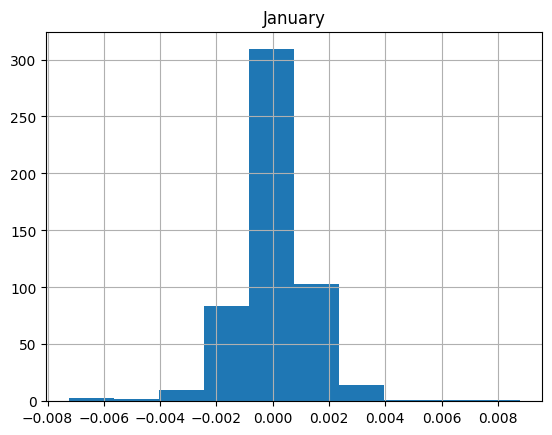

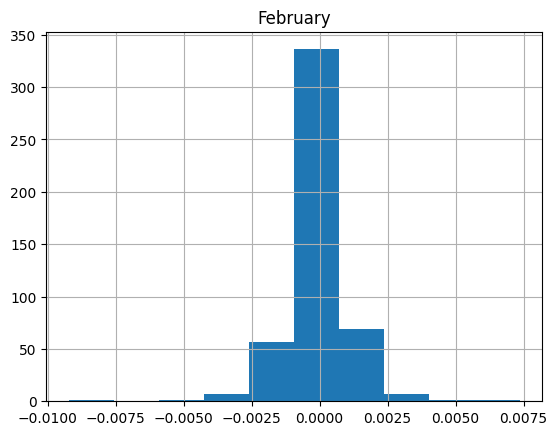

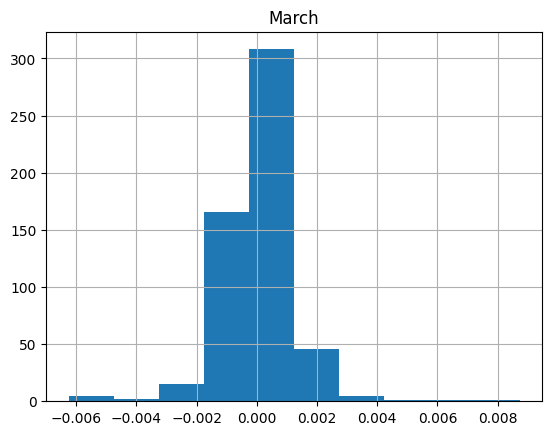

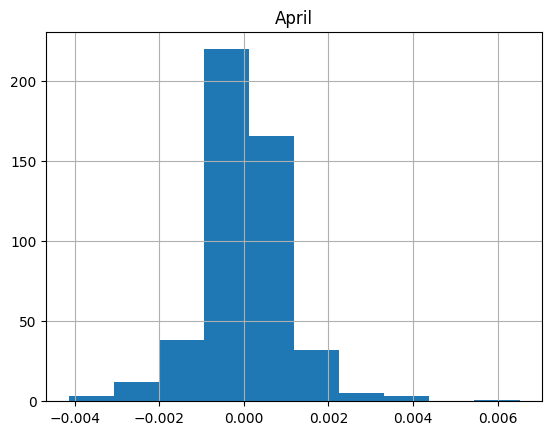

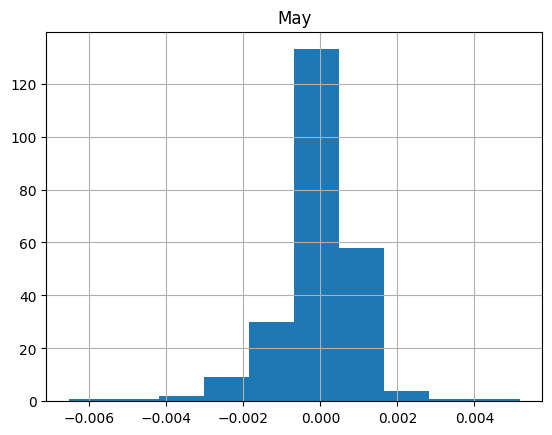

In [65]:
import locale
new_df = df_2023.groupby(pd.Grouper(freq='1M'))
for name, group in new_df:
    group['DiffPrice'].hist()
    #plt.title(name.month_name(locale='es_ES.utf8'))
    plt.title(name.strftime("%B"))
    #plt.title(name.month_name)
    plt.show()


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [66]:
### 1) Se leen los datos del dataset

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
df1 = breast_cancer_wisconsin_diagnostic


In [67]:
type(df1)

ucimlrepo.dotdict.dotdict

In [68]:
df1.keys()

dict_keys(['data', 'metadata', 'variables'])

In [69]:
### data
breast_cancer_wisconsin_diagnostic.data

{'ids':            ID
 0      842302
 1      842517
 2    84300903
 3    84348301
 4    84358402
 ..        ...
 564    926424
 565    926682
 566    926954
 567    927241
 568     92751
 
 [569 rows x 1 columns],
 'features':      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
 0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
 1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
 2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
 3      11.42     20.38       77.58   386.1      0.14250       0.28390   
 4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
 ..       ...       ...         ...     ...          ...           ...   
 564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
 565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
 566    16.60     28.08      108.30   858.1      0.08455       0.10230   
 567    20.60     29.33      140.1

In [70]:
### metadata
breast_cancer_wisconsin_diagnostic.metadata

{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
  'Olvi Mangasarian',
  'Nick Street',
  'W. Street'],
 'intro_paper': {'ID': 230,
  'type': 'NATIVE',
  'title': 'Nuclear feature extraction for breast tumor diagnosis',
  'authors': 'W. Street, W. Wolberg, O. Mangasarian',
  'venue': 'Electronic imaging',
  'yea

In [71]:
### variables
breast_cancer_wisconsin_diagnostic.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


In [72]:
### se visualiza el dataset completo
ids = pd.DataFrame(df1['data']['ids'])
features = pd.DataFrame(df1['data']['features'])
targets = pd.DataFrame(df1['data']['targets'])

df1 = pd.DataFrame.join(pd.DataFrame.join(ids,features),targets)
df1


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [73]:
### 2) Se nombran las columnas en formato PascalCase
cols = [''.join(word.capitalize() for word in df1.columns[i].split('_')) for i in range(len(df1.columns))]
#cols = [df1.columns[i].title().replace("_","") for i in range(len(df1.columns))]
cols
df1.columns = cols
df1

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [74]:
### 3) Se usan los métodos: head(), tail(), describe() e info() para obtener información
df1.head()


,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [75]:
df1.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [76]:
df1.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

In [78]:
### 4) se contabilizan valores nulos en el dataset
df1.isnull().sum()

,0
Id,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0


In [79]:
df1.isna().sum()

,0
Id,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0


En el caso de que hubieran valores nulos reemplazaría dichos valores con cero puesto que, todas las variables son numéricas.

In [80]:
### 5) Se identificar los valores únicos del segmento target
df1["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='Diagnosis', ylabel='count'>

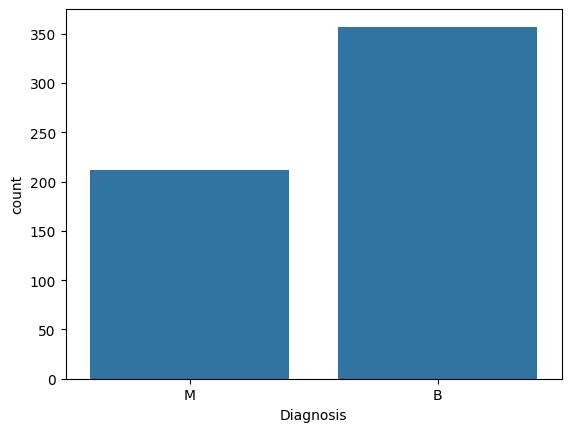

In [81]:
### 6) se cuentan las etiquetas anteriores
import seaborn as sns
sns.countplot(x="Diagnosis", data=df1)

In [82]:
### 7) Se agrega una columna DiagnosisNumeric
if df1["Diagnosis"][0] == "B":
    df1["DiagnosisNumeric"] = 0
else:
    df1["DiagnosisNumeric"] = 1

df1


,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,1


In [83]:
### 8) Normalización de cada columna
#df2 = df1.iloc[:,1:-2]
df_nor = abs((df1.iloc[:,1:-2]-df1.iloc[:,1:-2].mean())/df1.iloc[:,1:-2].std())
df_nor = pd.concat([df1.iloc[:,:1],df_nor,df1.iloc[:,-2:]],axis=1)
df_nor = df_nor.iloc[:,:-1]
df_nor

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,1.096100,2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M
1,842517,1.828212,0.353322,1.684473,1.907030,0.826235,0.486643,0.023825,0.547662,0.001391,...,0.368879,1.533776,1.888827,0.375282,0.430066,0.146620,1.086129,0.243675,0.280943,M
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M
3,84348301,0.768233,0.253509,0.592166,0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.133866,0.249720,0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M
4,84358402,1.748758,1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,0.009552,...,1.465481,1.337363,1.219651,0.220362,0.313119,0.612640,0.728618,0.867590,0.396751,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,0.312314,...,0.117596,1.751022,2.013529,0.378033,0.273077,0.663928,1.627719,1.358963,0.708467,M
565,926682,1.703356,2.083301,1.614511,1.722326,0.102368,0.017817,0.692434,1.262558,0.217473,...,2.045599,1.420690,1.493644,0.690623,0.394473,0.236365,0.733182,0.531387,0.973122,M
566,926954,0.701667,2.043775,0.672084,0.577445,0.839745,0.038646,0.046547,0.105684,0.808406,...,1.373645,0.578492,0.427529,0.808876,0.350427,0.326479,0.413705,1.103578,0.318129,M
567,927241,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M


In [84]:
### 9) Se promedian las filas con carcaterísticas similares
def caracter(caract,df):
  for kw in caract:
    # Encuentra columnas que contienen esa palabra clave
    cols_kw = [col for col in df.columns if kw in col]
    df[f'{kw}Mean'] = df[cols_kw].mean(axis=1)
  return df

caracteristica = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'ConcavePoints', "Symmetry", "FractalDimension"]
df_caract = caracter(caracteristica,df_nor)
df_caract

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,842302,1.096100,2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.822892,1.331460,2.133644,1.822793,1.029146,2.403566,1.827201,1.828182,2.037172,1.698454
1,842517,1.828212,0.353322,1.684473,1.907030,0.826235,0.486643,0.023825,0.547662,0.001391,...,1.377122,0.532558,1.160448,1.512536,0.602112,0.536342,0.203612,0.631241,0.349936,0.416063
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.438879,0.419712,1.253866,1.397605,0.588357,0.982746,0.809797,1.804099,0.775643,0.297391
3,84348301,0.768233,0.253509,0.592166,0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.458512,0.165896,0.376076,0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,84358402,1.748758,1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,0.009552,...,1.438539,1.135278,1.461481,1.411195,0.660750,0.300154,0.936729,1.099685,0.412639,0.485865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,0.312314,...,2.262762,0.303132,2.062496,2.319074,0.834796,0.227861,1.091639,2.004001,0.936231,0.602169
565,926682,1.703356,2.083301,1.614511,1.722326,0.102368,0.017817,0.692434,1.262558,0.217473,...,1.512694,2.129283,1.397014,1.502133,0.405543,0.160662,0.393593,0.934487,0.312618,0.840309
566,926954,0.701667,2.043775,0.672084,0.577445,0.839745,0.038646,0.046547,0.105684,0.808406,...,0.482422,1.224855,0.509009,0.395171,0.675876,0.349923,0.294468,0.377003,0.934205,0.416541
567,927241,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,1.651053,1.751949,1.906541,1.464675,1.042148,3.062208,2.596660,1.909844,1.459686,1.387908


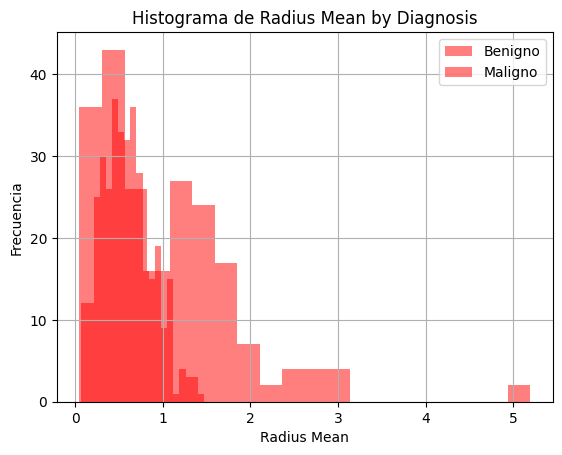

In [85]:
### 10) Histogramas para radio promedio
df_nor.groupby("Diagnosis")["RadiusMean"].hist(alpha=0.5, color="red", bins=20)
plt.xlabel("Radius Mean")
plt.ylabel("Frecuencia")
plt.legend(("Benigno", "Maligno"))
plt.title("Histograma de Radius Mean by Diagnosis")
plt.show()

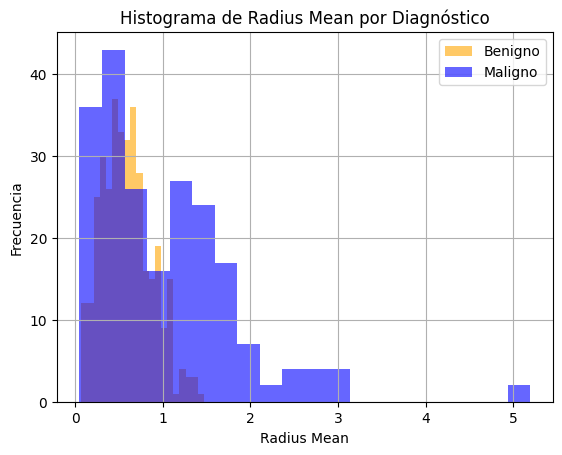

In [86]:
import matplotlib.pyplot as plt

# Filtrar según diagnóstico para seleccionar el color del histograma
radius_B = df_nor[df_nor["Diagnosis"] == "B"]["RadiusMean"]
radius_M = df_nor[df_nor["Diagnosis"] == "M"]["RadiusMean"]

# Crear el histograma
plt.hist(radius_B, alpha=0.6, color="orange", label="Benigno", bins=20)
plt.hist(radius_M, alpha=0.6, color="blue", label="Maligno", bins=20)

# Etiquetas y título
plt.xlabel("Radius Mean")
plt.ylabel("Frecuencia")
plt.title("Histograma de Radius Mean por Diagnóstico")
plt.legend()
plt.grid(True)
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean'),
  Text(8, 0, 'SymmetryMean'),
  Text(9, 0, 'FractalDimensionMean')])

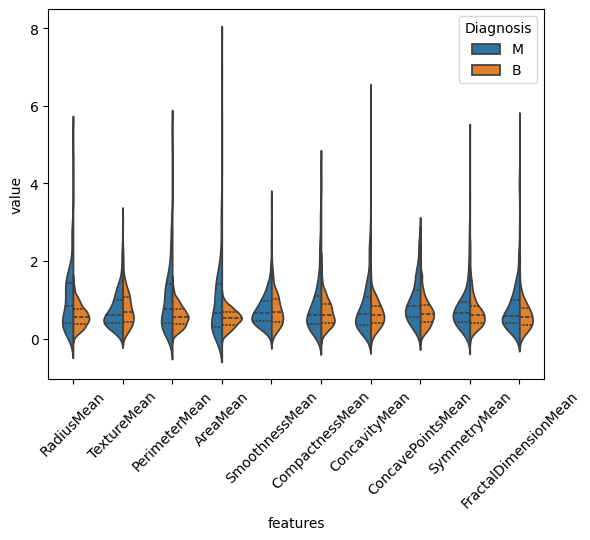

In [87]:
### 11) Se crea un gráfico tipo violín
data = pd.melt(df_caract.iloc[:, -11:], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

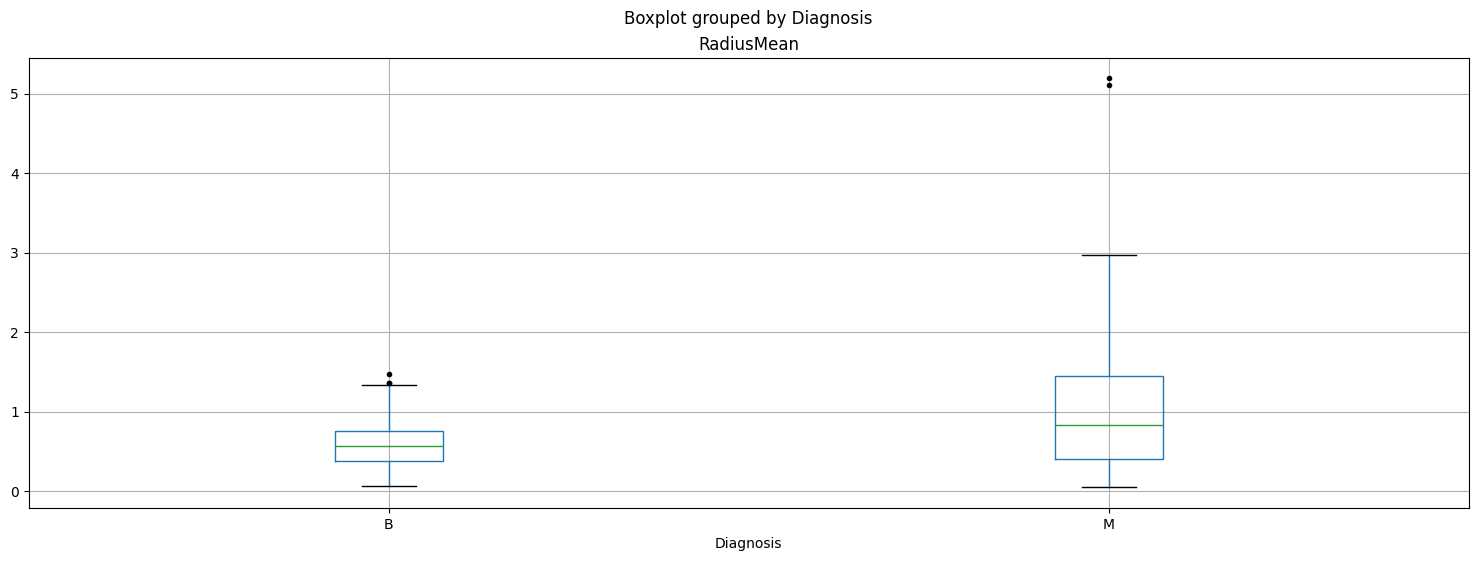

In [88]:
### 12) Se eliminan valores atipicos
df_nor.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

In [89]:
Q1 = df_caract['RadiusMean'].quantile(0.25)
Q3 = df_caract['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
df = df_caract[~((df_caract['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df_caract['RadiusMean'] > (Q3 + 1.5 * IQR)))]
df

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
1,842517,1.828212,0.353322,1.684473,1.907030,0.826235,0.486643,0.023825,0.547662,0.001391,...,1.377122,0.532558,1.160448,1.512536,0.602112,0.536342,0.203612,0.631241,0.349936,0.416063
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.438879,0.419712,1.253866,1.397605,0.588357,0.982746,0.809797,1.804099,0.775643,0.297391
3,84348301,0.768233,0.253509,0.592166,0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.458512,0.165896,0.376076,0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,84358402,1.748758,1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,0.009552,...,1.438539,1.135278,1.461481,1.411195,0.660750,0.300154,0.936729,1.099685,0.412639,0.485865
5,843786,0.475956,0.834601,0.386808,0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,...,0.298718,0.580101,0.274246,0.346105,1.479459,1.136165,0.762519,0.599362,0.963682,1.538197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,925622,0.310072,2.634331,0.470430,0.176210,0.600088,1.976019,2.084810,1.169266,1.154075,...,0.363880,1.813359,0.452582,0.208488,0.604477,2.224683,2.589868,1.234748,1.058277,1.758601
565,926682,1.703356,2.083301,1.614511,1.722326,0.102368,0.017817,0.692434,1.262558,0.217473,...,1.512694,2.129283,1.397014,1.502133,0.405543,0.160662,0.393593,0.934487,0.312618,0.840309
566,926954,0.701667,2.043775,0.672084,0.577445,0.839745,0.038646,0.046547,0.105684,0.808406,...,0.482422,1.224855,0.509009,0.395171,0.675876,0.349923,0.294468,0.377003,0.934205,0.416541
567,927241,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,1.651053,1.751949,1.906541,1.464675,1.042148,3.062208,2.596660,1.909844,1.459686,1.387908


In [90]:
correlacion = df_caract.iloc[:, -11:].corr(numeric_only=True)
correlacion


,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
RadiusMean,1.000000,0.037159,0.982593,0.970952,0.010922,0.169817,0.306712,0.561147,0.076188,0.012436
TextureMean,0.037159,1.000000,0.062288,0.021262,0.119759,0.129180,0.099011,0.131450,0.088855,0.067740
PerimeterMean,0.982593,0.062288,1.000000,0.957487,0.016983,0.229054,0.341554,0.609748,0.108891,0.006551
AreaMean,0.970952,0.021262,0.957487,1.000000,-0.006186,0.139985,0.273070,0.506730,0.050723,-0.014013
SmoothnessMean,0.010922,0.119759,0.016983,-0.006186,1.000000,0.289601,0.197795,0.242456,0.285890,0.367301
CompactnessMean,0.169817,0.129180,0.229054,0.139985,0.289601,1.000000,0.709973,0.573193,0.478928,0.563719
ConcavityMean,0.306712,0.099011,0.341554,0.273070,0.197795,0.709973,1.000000,0.679274,0.369552,0.455381
ConcavePointsMean,0.561147,0.131450,0.609748,0.506730,0.242456,0.573193,0.679274,1.000000,0.324263,0.211079
SymmetryMean,0.076188,0.088855,0.108891,0.050723,0.285890,0.478928,0.369552,0.324263,1.000000,0.339184
FractalDimensionMean,0.012436,0.067740,0.006551,-0.014013,0.367301,0.563719,0.455381,0.211079,0.339184,1.000000


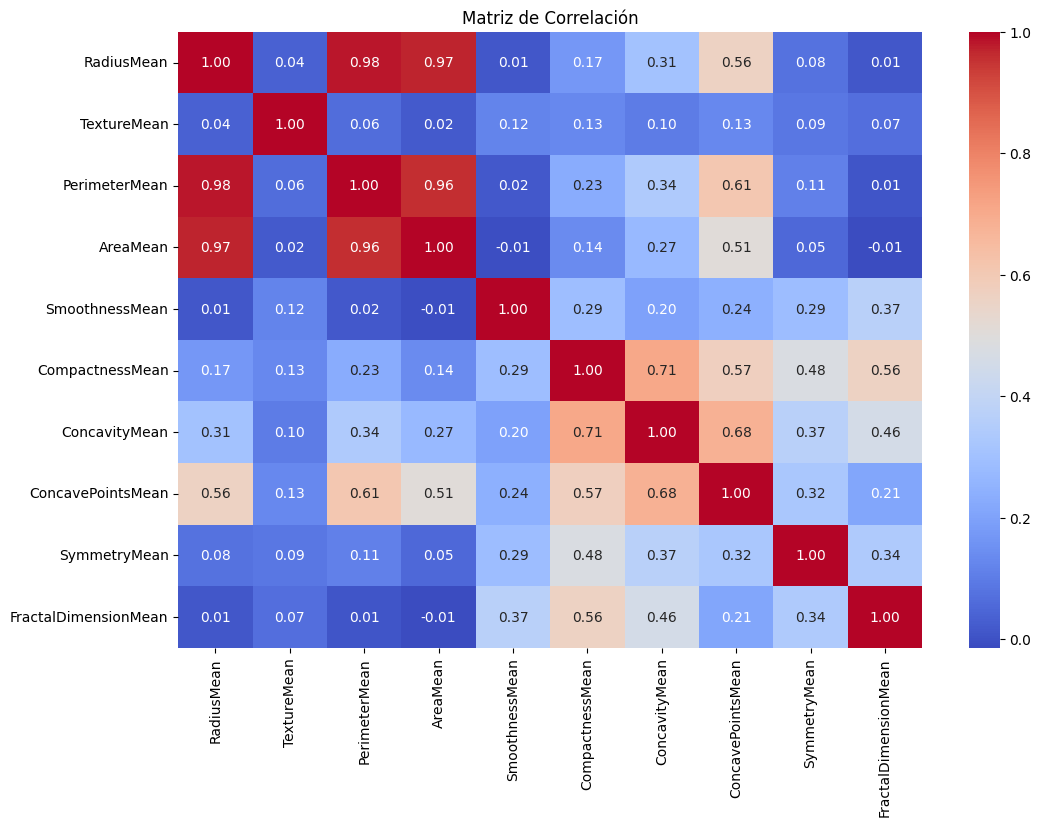

In [91]:
### 13) Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [92]:
### 14) Otros tipos de gráficos


Se pueden usar gráficos por categorías o comparación entre gupos como suelen ser el counplot(). Por otro lado, cuando se poseen datos en varias dimensiones es de gran utilidad hacer gráficos de PCA (Análisis de Componentes Principales)